# Medical research

## EDA

In [3]:
import csv
import pandas as pd
import matplotlib.pyplot as plt

,Patient_ID,Age,Gender,Symptom_1,Symptom_2,Symptom_3,Heart_Rate_bpm,Body_Temperature_C,Blood_Pressure_mmHg,Oxygen_Saturation_%,Diagnosis,Severity,Treatment_Plan
0,1,74,Male,Fatigue,Sore throat,Fever,69,39.4,132/91,94,Flu,Moderate,Medication and rest
1,2,66,Female,Sore throat,Fatigue,Cough,95,39.0,174/98,98,Healthy,Mild,Rest and fluids
2,3,32,Male,Body ache,Sore throat,Fatigue,77,36.8,136/60,96,Healthy,Mild,Rest and fluids
3,4,21,Female,Shortness of breath,Headache,Cough,72,38.9,147/82,99,Healthy,Mild,Rest and fluids
4,5,53,Male,Runny nose,Sore throat,Fatigue,100,36.6,109/106,92,Healthy,Mild,Rest and fluids
5,6,22,Male,Sore throat,Fever,Cough,90,39.5,107/92,93,Flu,Moderate,Medication and rest
6,7,21,Male,Sore throat,Fatigue,Cough,71,37.5,126/82,93,Bronchitis,Severe,Hospitalization and medication
7,8,71,Male,Headache,Shortness of breath,Runny nose,64,38.6,153/99,99,Healthy,Mild,Rest and fluids
8,9,56,Female,Shortness of breath,Fever,Headache,103,36.2,152/71,96,Cold,Mild,Rest and fluids
9,10,53,Male,Cough,Fever,Headache,62,39.5,111/104,98,Flu,Moderate,Medication and rest


C:\Users\vmelnyk2\AppData\Local\Temp\ipykernel_34000\607555568.py:16: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_results = data[selected_fields].corrwith(data["treatment_plan_int"])


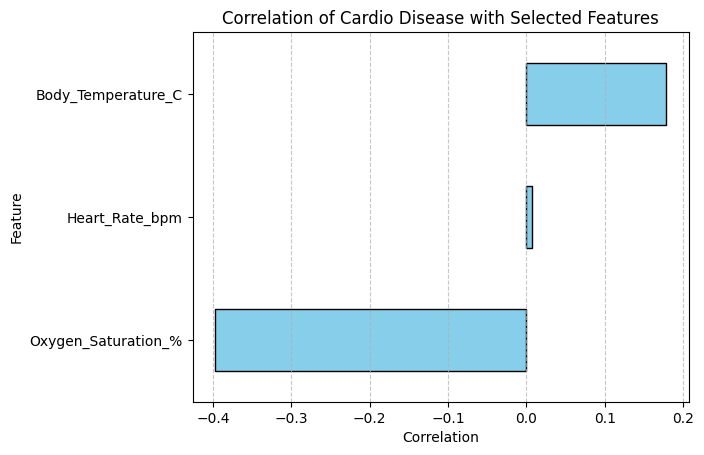

In [9]:
# Medical research
data = pd.read_csv('../resources/medical/disease_diagnosis.csv')

display(data.head(10))

selected_fields = ['Oxygen_Saturation_%', 'Heart_Rate_bpm', 'Body_Temperature_C', 'Blood_Pressure_mmHg']

data['treatment_plan_int'] = data['Treatment_Plan'].map({'Medication and rest': 1, 
                                                         'Rest and fluids': 0, 
                                                         'Hospitalization and medication': 2})

data['Blood_Pressure_mmHg_lower'] = data['Blood_Pressure_mmHg'].apply(lambda x: int(x.split('/')[1]) if isinstance(x, str) and '/' in x else None)
data['Blood_Pressure_mmHg_upper'] = data['Blood_Pressure_mmHg'].apply(lambda x: int(x.split('/')[0]) if isinstance(x, str) and '/' in x else None)


correlation_results = data[selected_fields].corrwith(data["treatment_plan_int"])

correlation_results.plot(kind="barh", color="skyblue", edgecolor="black")
plt.xlabel("Correlation")
plt.ylabel("Feature")
plt.title("Correlation of Cardio Disease with Selected Features")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()

In [17]:
print(min(data['Body_Temperature_C']), max(data['Body_Temperature_C']))
data['Body_Temperature_C_scaled'] = (data['Body_Temperature_C'] - min(data['Body_Temperature_C'])) / (max(data['Body_Temperature_C']) - min(data['Body_Temperature_C']))

35.5 40.0


2000 2000
Accuracy: 0.6675
              precision    recall  f1-score   support

           0       0.67      1.00      0.80       267
           1       0.00      0.00      0.00        58
           2       0.00      0.00      0.00        75

    accuracy                           0.67       400
   macro avg       0.22      0.33      0.27       400
weighted avg       0.45      0.67      0.53       400



c:\Users\vmelnyk2\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\vmelnyk2\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\vmelnyk2\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

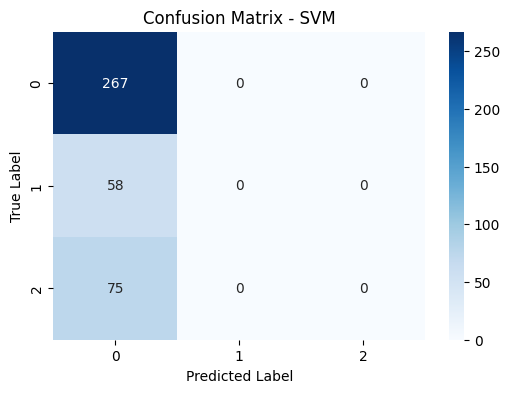

In [18]:
from sklearn.svm import SVC 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns

numerical_features = ['Oxygen_Saturation_%', 'Heart_Rate_bpm', 'Body_Temperature_C_scaled',
                      'Blood_Pressure_mmHg_upper', 'Blood_Pressure_mmHg_lower', 'Age']

X = data[numerical_features]
y = data['treatment_plan_int']

print(len(X), len(y)) 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# initialize svm classifier
svm_model = SVC(kernel="rbf", probability=True, random_state=42)
svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(classification_report(y_test, y_pred))

# confusion matrix:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["0", "1", "2"], yticklabels=["0", "1", "2"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - SVM")
plt.show()